## 2.0 Intro
Exploring and visualizing eloquency and strong language usage by rappers

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import json
import os
from tqdm import tqdm
from collections import Counter
import numpy as np
import csv

Variables setting:

In [2]:
MAIN_PATH = "/home/jack/datasets/polish_rap/"
DICTIONARIES_PATH = "/home/jack/datasets/polish_dictionaries/"
DICTIONARY_NAME = "slownik_znormalizowany.json"

**VERSES_MAX** - only so many verses will be explored, to allow for comparision between more and less popular rappers

In [3]:
VERSES_MAX = 12000

In [4]:
RAPPERS_PATH = MAIN_PATH + "/stm_lyrics/"

## 2.1 Strong language exploration
We have a lemmatized version of strong language dictionary from the previous step, now we can check if rap music is really so full of strong language

In [5]:
def get_strong_words():
    with open(DICTIONARIES_PATH + "strong_language_lem.json", "r") as f:
        return json.load(f)

In [6]:
strongs = set(get_strong_words())

In [7]:
len(strongs)

304

In [8]:
from random import shuffle

def get_all_strongs():
    rappers_strongs = {}
    strongs_count = Counter()
    rappers = os.listdir(RAPPERS_PATH)
    for rapper in rappers:
        songs = os.listdir(RAPPERS_PATH + rapper)
        shuffle(songs)
        num_songs = len(songs)
        num_strongs = 0
        for song in songs:
            with open(RAPPERS_PATH + rapper + "/" + song, "r") as f:
                song_text = json.load(f)
            song_words = song_text["lyrics"].split()
            strongs_in_song = list(filter(lambda x: x in strongs, song_words))
            num_strongs += len(strongs_in_song)
            strongs_count += Counter(strongs_in_song)
        rappers_strongs[rapper] = num_strongs/num_songs
    return rappers_strongs, strongs_count

In [9]:
all_rapers_strongs, strongs_count = get_all_strongs()

In [10]:
rappers_df = pd.DataFrame.from_dict(all_rapers_strongs, "index")
rappers_df.sort_values(by=0, inplace=True, ascending=False)

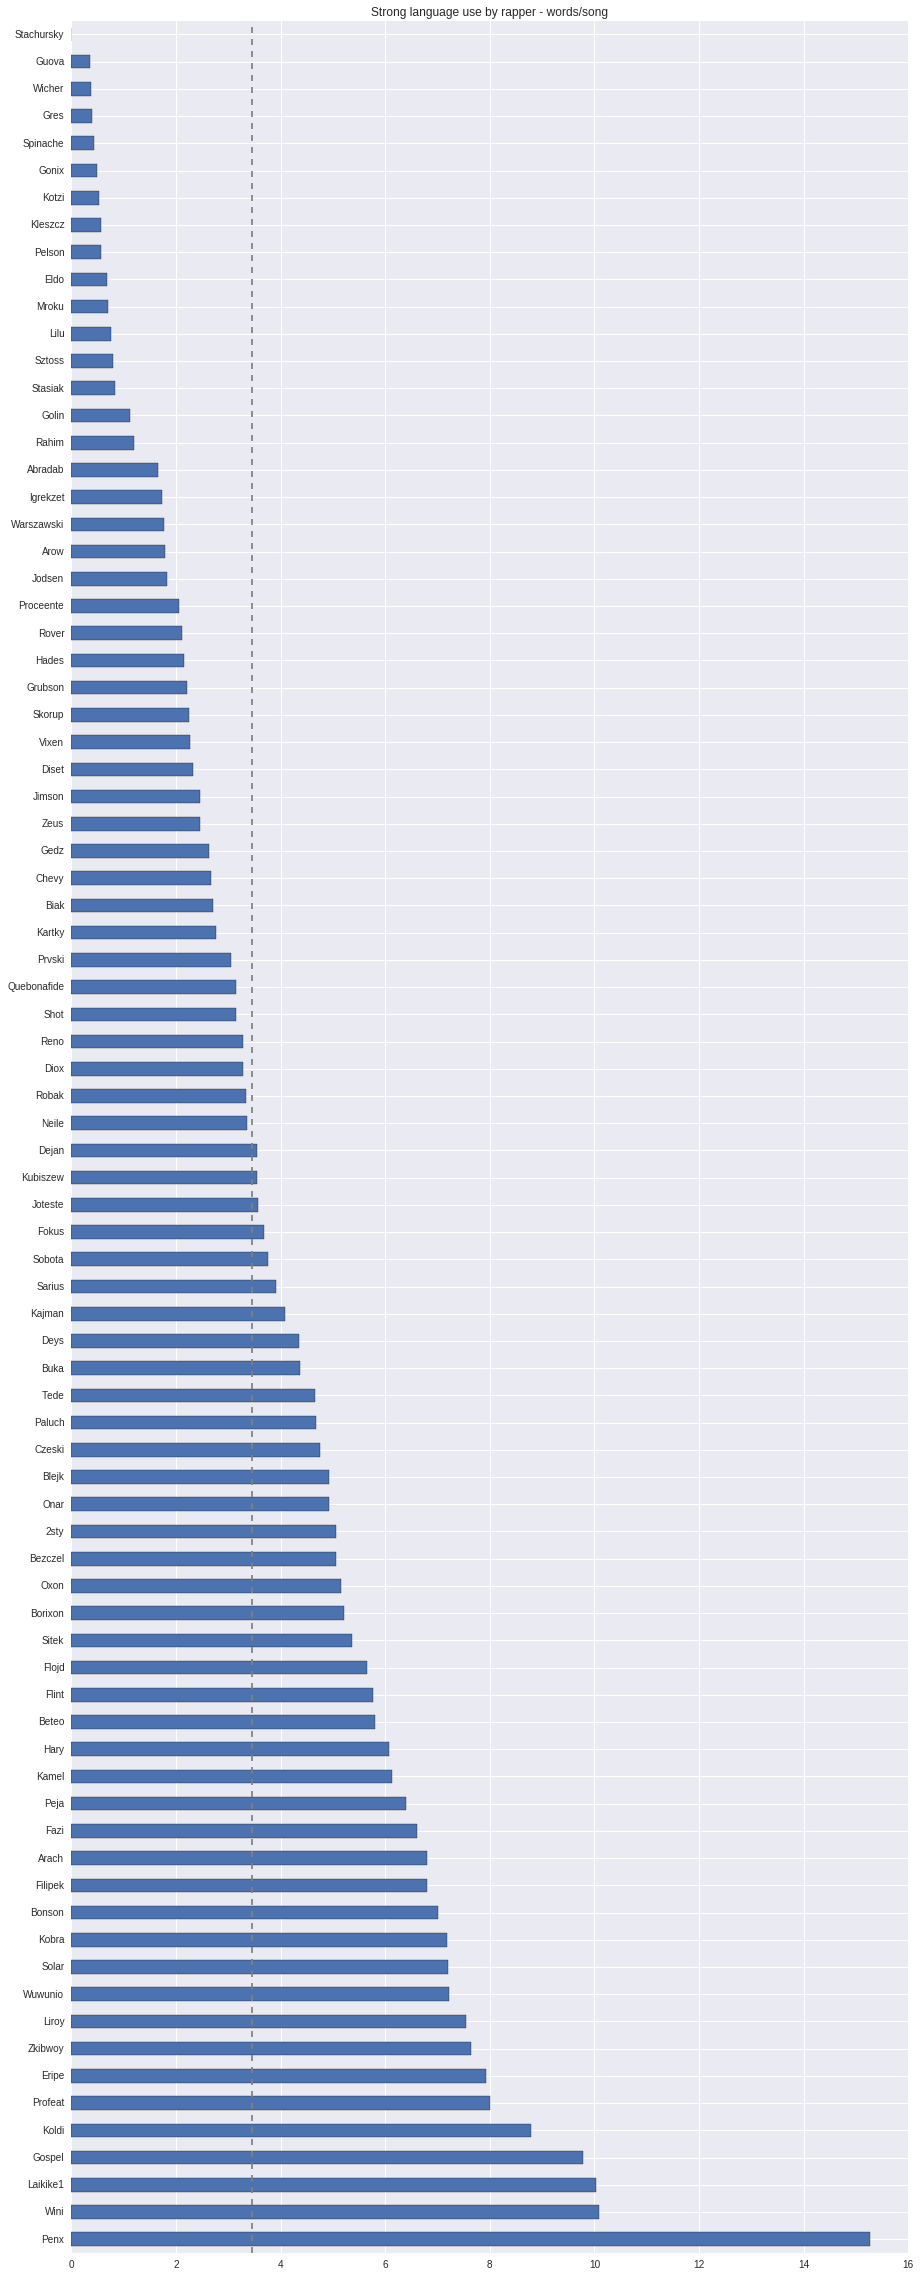

In [11]:
fig = plt.figure()
rappers_df[0].plot(kind="barh", figsize=(15, 40))
plt.axvline(x=float(rappers_df.median(0)), color="grey", linestyle="dashed")
plt.title("Strong language use by rapper - words/song")

Dashed line shows median

In [12]:
print("Median of curses per song is: " + str(rappers_df.median(0)[0]))

Median of curses per song is: 3.45186781609


### Most popular curses

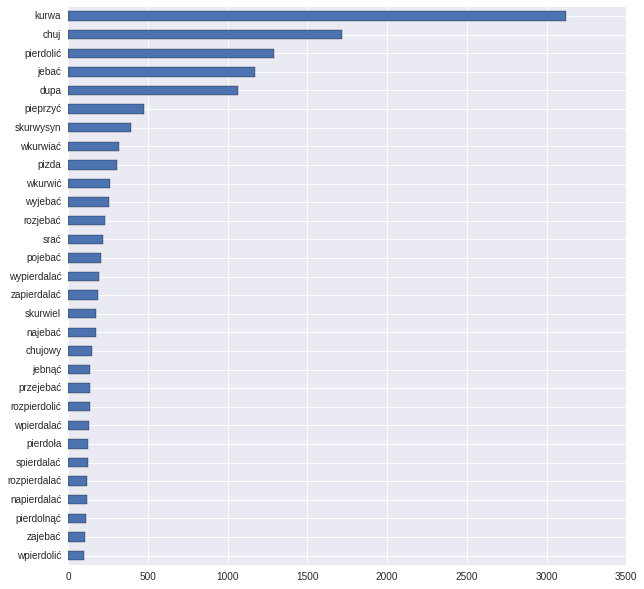

In [13]:
strongs_df = pd.Series(dict(strongs_count))
strongs_df[strongs_df > 100].sort_values().plot(kind="barh", figsize=(10,10))

## 2.2 Eloquency exploration
Now we can check which rappers are the most eloquent ones, measured by number of different words / all words they used.

In [14]:
def build_dict():
    with open(DICTIONARIES_PATH + DICTIONARY_NAME, "r") as f:
        return json.load(f)
slownik_pl_dict = build_dict()

In [15]:
def ok_word(word):
    return word in slownik_pl_dict

In [16]:
all_vocab = Counter()
rappers = os.listdir(RAPPERS_PATH)
for rapper in tqdm(rappers):
    songs = os.listdir(RAPPERS_PATH + rapper)
    for song in songs:
        with open(RAPPERS_PATH + rapper + "/" + song, "r") as f:
            song_text = json.load(f)
        song_words = song_text["lyrics"].split()
        all_vocab += Counter(song_words)

100%|██████████| 82/82 [00:15<00:00,  3.52it/s]


In [17]:
# len(set(all_vocab))

In [18]:
all_ok_vocab = set(filter(ok_word, all_vocab))
len(all_ok_vocab)

27590

In [19]:
from random import shuffle

def get_vocab():
    rappers_vocab = {}
    unique_words = {}
    rappers_len = {}
    rappers_nokwords = {}
    
    rappers = os.listdir(RAPPERS_PATH)
    
    for rapper in tqdm(rappers):
        rapper_vocab = Counter()
        rapper_nokwords = set()
        songs = os.listdir(RAPPERS_PATH + rapper)
        shuffle(songs)
        num_songs = len(songs)
        rapper_len = 0
        for song in songs:
            if rapper_len <= VERSES_MAX:
                with open(RAPPERS_PATH + rapper + "/" + song, "r") as f:
                    song_text = json.load(f)
                song_words = song_text["lyrics"].split()[:(VERSES_MAX - rapper_len)]
                #filter out every non-existent word
                song_words_ok = list(filter(ok_word, song_words))
                rapper_nokwords |= set(filter(lambda x: not ok_word(x), song_words))
                rapper_vocab += Counter(song_words_ok)
                rapper_len += len(song_words_ok) #maybe it would be better to include just song_words_ok
                other_words = set(all_vocab - rapper_vocab)
        unique_words[rapper] = set(rapper_vocab) - other_words
        rappers_vocab[rapper] = set(rapper_vocab)
        rappers_len[rapper] = rapper_len
        rappers_nokwords[rapper] = rapper_nokwords
#         print(rapper, " Unq:", len(unique_words[rapper]), "ALL", rapper_len, "Nok", 
#               len(rapper_nokwords), "Wds", len(rappers_vocab[rapper]))
    return rappers_vocab, unique_words, rappers_len, rappers_nokwords

In [20]:
rappers_vocab, unique_words, rappers_allwords, rappers_nokwords = get_vocab()

100%|██████████| 82/82 [03:05<00:00,  2.13s/it]


In [21]:
vocab_df = pd.Series(rappers_vocab).to_frame("vocab")
unique_df = pd.Series(unique_words).to_frame("unique")
allwords_df = pd.Series(rappers_allwords).to_frame("allwords")
nokwords_df = pd.Series(rappers_nokwords).to_frame("nokwords")

frames = [vocab_df, unique_df, allwords_df, nokwords_df]
rap_df = pd.concat(frames, axis=1)

Number of processed verses per rapper 

In [22]:
rappers_allwords

{'2sty': 12000,
 'Abradab': 12000,
 'Arach': 1617,
 'Arow': 4568,
 'Beteo': 6591,
 'Bezczel': 12000,
 'Biak': 2026,
 'Blejk': 3461,
 'Bonson': 12000,
 'Borixon': 12000,
 'Buka': 12000,
 'Chevy': 1182,
 'Czeski': 5027,
 'Dejan': 7541,
 'Deys': 12000,
 'Diox': 11415,
 'Diset': 11070,
 'Eldo': 12000,
 'Eripe': 12000,
 'Fazi': 1448,
 'Filipek': 12000,
 'Flint': 12000,
 'Flojd': 6792,
 'Fokus': 12000,
 'Gedz': 12000,
 'Golin': 8119,
 'Gonix': 2364,
 'Gospel': 12000,
 'Gres': 2979,
 'Grubson': 12000,
 'Guova': 3438,
 'Hades': 8937,
 'Hary': 8155,
 'Igrekzet': 2192,
 'Jimson': 10706,
 'Jodsen': 7399,
 'Joteste': 2476,
 'Kajman': 12000,
 'Kamel': 2647,
 'Kartky': 12000,
 'Kleszcz': 4272,
 'Kobra': 11999,
 'Koldi': 12000,
 'Kotzi': 6860,
 'Kubiszew': 8559,
 'Laikike1': 12000,
 'Lilu': 8006,
 'Liroy': 11798,
 'Mroku': 5147,
 'Neile': 12000,
 'Onar': 12000,
 'Oxon': 12000,
 'Paluch': 12000,
 'Peja': 12000,
 'Pelson': 11020,
 'Penx': 12000,
 'Proceente': 5682,
 'Profeat': 1918,
 'Prvski': 3823,
 '

In [23]:
rap_df.head()

vocab  \
2sty     {dość, śmietnik, plątać, spotkać, przycisnąć, ...   
Abradab  {fantazja, dość, kapa, spotkać, małolata, lico...   
Arach    {trasa, ptak, opinia, biały, nadal, małolata, ...   
Arow     {dość, łapię, musiał, ciasny, obiad, wake, spo...   
Beteo    {dość, wyrwać, małolata, niszczyć, też, pogard...   

                                                    unique  allwords  \
2sty     {melasa, kalifat, gyros, niewierność, magellan...     12000   
Abradab  {ojcowski, kapa, cielesny, koklusz, scratchowa...     12000   
Arach    {fetować, wielorybi, zawrotny, nietolerancyjny...      1617   
Arow     {krwiodawstwo, nadzwyczaj, palcówka, karowy, o...      4568   
Beteo    {studencik, dwutygodniówka, aloes, palonka, up...      6591   

                                                  nokwords  
2sty     {kingpiny, taksówą, j, sory, wirunek, niz, pen...  
Abradab  {spryciuch, tro, portos, j, męciu, phantomas, ...  
Arach    {bazuka, bushid, facebooka, panczach, play, ch...  
Arow     {veeegas, sativa, sory, pszem, laidback, flow,...  
Beteo    {x, iphone, trrtrr, kminisz, ławkiobcinammówię...

In [24]:
rap_df["vocab_size"] = rap_df["vocab"].map(len)
rap_df["unique_size"] = rap_df["unique"].map(len)
rap_df["nokwords_size"] = rap_df["nokwords"].map(len)
rap_df["eloquency"] = rap_df["vocab_size"] / rap_df["allwords"]

Comparision only makes sense if number of verses if >= **VERSES_MAX**/2, so there is no more than 2x difference between particular rappers

In [25]:
popular_rappers = rap_df[rap_df["allwords"] > VERSES_MAX/2]

In [26]:
len(popular_rappers)

53

In [27]:
popular_rappers.sort_values(by="eloquency", ascending=False)

vocab  \
Kotzi        {pastwa, spotkać, radomska, niszczyć, ciężko, ...   
Skorup       {dość, nieboskłon, śmietnik, wypieki, spotkać,...   
Golin        {fantazja, dość, wyrwać, spotkać, irak, syfili...   
Rahim        {fantazja, spotkać, nacierać, lico, uwieńczać,...   
Jodsen       {fantazja, dość, debiutant, tupolew, kometa, i...   
Jimson       {dość, spotkać, glut, małolata, bożek, sceneri...   
Hades        {dość, spotkać, małolata, wjebać, pokora, chwi...   
Dejan        {dość, wyrwać, spotkać, debiutant, małolata, d...   
Buka         {dość, wyrwać, spotkać, namiętnie, oh, wjebać,...   
Hary         {fantazja, dość, wyrwać, spotkać, małolata, oh...   
Peja         {fantazja, spotkać, małolata, oh, zwariowany, ...   
Flojd        {wyrwać, spotkać, małolata, wjebać, plask, pub...   
Deys         {przywiesić, dość, plątać, wyrwać, oh, wjebać,...   
Eldo         {dość, spotkać, oh, irak, przycisnąć, ślisko, ...   
Pelson       {wyrwać, spotkać, debiutant, kometa, publika, ...   
Paluch       {spotkać, małolata, wjebać, kometa, ulubieniec...   
Quebonafide  {fantazja, dość, krzyć, nacierać, oh, wjebać, ...   
Filipek      {dość, wyrwać, morgenstern, małolata, spotkać,...   
Eripe        {fantazja, dość, spotkać, małolata, drewniany,...   
Neile        {dość, plątać, wypieki, śmietnik, spotkać, zem...   
Wini         {dość, plątać, wyrwać, nieustanny, oh, wjebać,...   
Rover        {dość, śmietnik, wyrwać, spotkać, wjebać, kome...   
Kajman       {dość, nieboskłon, spotkać, pastwa, zemrzeć, z...   
Fokus        {nieboskłon, dość, wyrwać, spotkać, małolata, ...   
Zeus         {dość, wyrwać, spotkać, ukochać, niszczyć, też...   
Flint        {dość, wyrwać, spotkać, wjebać, mleko, publika...   
Gospel       {antybakteryjny, nieboskłon, tuczyć, dość, dis...   
Laikike1     {dość, śmietnik, wyrwać, spotkać, wjebać, efek...   
Oxon         {nieboskłon, dość, spotkać, małolata, uchroń, ...   
Beteo        {dość, wyrwać, małolata, niszczyć, też, pogard...   
Bezczel      {dość, śmietnik, wyrwać, spotkać, nieustanny, ...   
Abradab      {fantazja, dość, kapa, spotkać, małolata, lico...   
Kobra        {fantazja, dość, spotkać, małolata, oh, wjebać...   
Gedz         {fantazja, dość, śmietnik, wyrwać, spotkać, oh...   
Diox         {nieboskłon, dość, spotkać, publika, unosić, p...   
Solar        {dość, wyrwać, spotkać, małolata, irak, przyby...   
2sty         {dość, śmietnik, plątać, spotkać, przycisnąć, ...   
Kubiszew     {spotkać, zwariowany, pokora, unosić, fraza, p...   
Sobota       {dość, spotkać, małolata, fraza, wytrzeźwieć, ...   
Diset        {dość, plątać, zwietrzały, wyrwać, spotkać, oh...   
Sarius       {dość, tuczyć, wyrwać, spotkać, małolata, oh, ...   
Grubson      {dość, wyrwać, spotkać, małolata, kometa, tupo...   
Penx         {dość, wyrwać, spotkać, oh, wjebać, kometa, śl...   
Sitek        {dość, spotkać, małolata, tupolew, potrzebnie,...   
Lilu         {plątać, spotkać, oh, mania, ukochać, też, dzi...   
Onar         {fantazja, śmietnik, wyrwać, przeraźliwie, spo...   
Kartky       {dość, spotkać, kometa, mania, publika, ukocha...   
Vixen        {fantazja, dość, wyrwać, spotkać, małolata, ko...   
Tede         {dość, spotkać, małolata, kwasy, tank, litość,...   
Borixon      {fantazja, dość, przywiesić, wyrwać, spotkać, ...   
Bonson       {dość, spotkać, dostały, unosić, rwać, wołać, ...   
Liroy        {fantazja, dość, spotkać, banalnie, wołać, też...   
Koldi        {wyrwać, spotkać, namiętnie, małolata, tupolew...   

                                                        unique  allwords  \
Kotzi        {prymitywnie, skalniak, ufundować, wydmuchiwać...      6860   
Skorup       {podrzędny, dziuba, opiewać, odlotowy, ohio, g...      7663   
Golin        {dzwonnica, wynalazca, wymalować, arystokrata,...      8119   
Rahim        {nieostry, zaaferować, oczywistość, niziołek, ...      9029   
Jodsen       {farmakologia, kilowatogodzina, obopólny, pows...      7399   
Jimson       {kir, czadra, pośpieszn

In [28]:
popular_rappers.to_csv(MAIN_PATH + "popular_rappers.csv", sep="\t", encoding="utf-8")

In [29]:
if not os.path.exists(MAIN_PATH + "d2v_config/"):
    os.mkdir(MAIN_PATH + "d2v_config/")
popular_rappers.to_json("/home/jack/datasets/polish_rap/d2v_config/popular_rappers.json")

### Examples ofno-ok words (words that haven't been found in the dictionary)

In [30]:
list(rap_df.ix["Peja"]["nokwords"])[:10]

['beefy',
 'j',
 'bronxie',
 'undergrnadowy',
 'dolargan',
 'decksa',
 'kurestwo',
 'blogo',
 'headshot',
 'biegusiem']